# Entropy of K-mers

This program is designed to find and analyze the entropy of k-mers in the E. Coli Genome. Entropy is a measure of randomness of a variable, and in this case it is the randomness of the distribution of bases in the k-mers of the genome. For a probability distribution $X$ with the events $x_1,\ x_2,\ x_3,\ ...,\ x_n$ each having probability $p(x_1),\ p(x_2),\ p(x_3),\ ...,\ p(x_n)$, respectively, the entropy is calculated as $\begin{equation*} -\sum_{i=1}^n p(x_i) \log_2(p(x_i)) \end{equation*}$. In our case, the events are the base pairs of the k-mer (A, C, G, and T), and the maximum entropy would be 2, which occurs when each of the bases are evenly distributed.

In [1]:
pwd

'/Users/gfeng2001/anaconda3/Practice'

In [2]:
less GCF_000005845.2_ASM584v2_genomic.fna

This cell of code has 3 functions.
The first function is an algorithm that returns a list of the entropy, corresponding to the entropy of the k-mer at every position for a specified k.
The second function is an algorithm that returns a 2-d array of position in the first list and entropy in the second list. The entropy is sampled such that it takes the entropy of the k-mer at every 10th position.
The third function returns the average entropy of all k-mers for a given k.

In [3]:
import numpy as np

f = open("GCF_000005845.2_ASM584v2_genomic.fna", 'r')
#f = open("short.fna", 'r')
i = 0
s = ""
for line in f:
    if i!=0:
        s += line[:-1]
    i+=1
    
def alg(k):
    x = [0]*(len(s)-k+1)
    y = [0]*(len(s)-k+1)
    curr = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

    print("k = %d" %k)
    print("Length: %d" %len(s))

    def add(char): 
        if char == 'A':
            curr['A'] +=1
        if char == 'C':
            curr['C'] +=1
        if char == 'G':
            curr['G'] +=1
        if char == 'T':
            curr['T'] +=1
        return

    def remove(char): 
        if char == 'A':
            curr['A'] -=1
        if char == 'C':
            curr['C'] -=1
        if char == 'G':
            curr['G'] -=1
        if char == 'T':
            curr['T'] -=1
        return

    def entropy():
        e=0.0
        if curr['A'] != 0:
            a = curr['A']*1.0/k
            ap = a*np.log2(a)
            e -= ap
        if curr['C'] != 0:
            c = curr['C']*1.0/k
            cp = c*np.log2(c)
            e -= cp
        if curr['G'] != 0:
            g = curr['G']*1.0/k
            gp = g*np.log2(g)
            e -= gp
        if curr['T'] != 0:
            t = curr['T']*1.0/k
            tp = t*np.log2(t)
            e -= tp
        return e

    for i in range(0, k):
        add(s[i])

    x[0] = 0
    y[0] = entropy()
    min = 2.0
    imin = 0
    if y[0] < min:
        min = y[0]
    
    for i in range(1, len(s)-k+1): #i is the start position of the k-mer
        remove(s[i-1])
        add(s[i+k-1])
        x[i] = i
        #y[i] = int(10*entropy())
        y[i] = entropy()
        if y[i] < min:
            min = y[i]
            imin = i
        #if y[i] < 0.3:
            #print(s[i: i+k])
        #print(y[i])
    
    print("Minimum Entropy: %f at position %d" %(min, imin))
    print("%d-mer before: %s" %(k, s[imin-k: imin]))
    print("Minimum entropy %d-mer: %s" %(k, s[imin: imin+k]))  
    print("%d-mer after: %s" %(k, s[imin+k: imin+2*k]))
    return y


########################################


def algSamp(k):

    w = int((len(s)-k)/100 + 1)
    h = 2
    a = [[0 for x in range(w)] for y in range(h)] 
    curr = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

    print("k = %d" %k)
    print("Length: %d" %len(s))

    def add(char): 
        if char == 'A':
            curr['A'] +=1
        if char == 'C':
            curr['C'] +=1
        if char == 'G':
            curr['G'] +=1
        if char == 'T':
            curr['T'] +=1
        return

    def remove(char): 
        if char == 'A':
            curr['A'] -=1
        if char == 'C':
            curr['C'] -=1
        if char == 'G':
            curr['G'] -=1
        if char == 'T':
            curr['T'] -=1
        return

    def entropy():
        e=0.0
        if curr['A'] != 0:
            a = curr['A']*1.0/k
            ap = a*np.log2(a)
            e -= ap
        if curr['C'] != 0:
            c = curr['C']*1.0/k
            cp = c*np.log2(c)
            e -= cp
        if curr['G'] != 0:
            g = curr['G']*1.0/k
            gp = g*np.log2(g)
            e -= gp
        if curr['T'] != 0:
            t = curr['T']*1.0/k
            tp = t*np.log2(t)
            e -= tp
        return e

    for i in range(0, k):
        add(s[i])

    a[0][0] = 0
    a[1][0] = entropy()
    min = 2.0
    imin = 0
    if a[1][0] < min:
        min = a[1][0]
    
    for i in range(1, len(s)-k+1): #i is the start position of the k-mer
        remove(s[i-1])
        add(s[i+k-1])
        if i%100 == 0:
            a[0][int(i/100)] = i
            a[1][int(i/100)] = entropy()
        if a[1][int(i/100)] < min:
            min = a[1][int(i/100)]
            imin = i
    
    print("Minimum Entropy: %f at position %d" %(min, imin))
    print("%d-mer before: %s" %(k, s[imin-k: imin]))
    print("Minimum entropy %d-mer: %s" %(k, s[imin: imin+k]))  
    print("%d-mer after: %s" %(k, s[imin+k: imin+2*k]))
    return a


########################################


def averageEntropy(k):
    sum = 0.0
    curr = {'A': 0, 'C': 0, 'G': 0, 'T': 0}

    def add(char): 
        if char == 'A':
            curr['A'] +=1
        if char == 'C':
            curr['C'] +=1
        if char == 'G':
            curr['G'] +=1
        if char == 'T':
            curr['T'] +=1
        return

    def remove(char): 
        if char == 'A':
            curr['A'] -=1
        if char == 'C':
            curr['C'] -=1
        if char == 'G':
            curr['G'] -=1
        if char == 'T':
            curr['T'] -=1
        return

    def entropy():
        e=0.0
        if curr['A'] != 0:
            a = curr['A']*1.0/k
            ap = a*np.log2(a)
            e -= ap
        if curr['C'] != 0:
            c = curr['C']*1.0/k
            cp = c*np.log2(c)
            e -= cp
        if curr['G'] != 0:
            g = curr['G']*1.0/k
            gp = g*np.log2(g)
            e -= gp
        if curr['T'] != 0:
            t = curr['T']*1.0/k
            tp = t*np.log2(t)
            e -= tp
        return e
    
    for i in range(0, k):
        add(s[i])
        
    sum += entropy()
    
    for i in range(1, len(s)-k+1): #i is the start position of the k-mer
        remove(s[i-1])
        add(s[i+k-1])
        sum += entropy()
    
    return sum/(len(s)-k+1.0)

This cell of code draws the graph of sampled Position vs Entropy for k=15, 30, and 60, using the algSamp() function

k = 15
Length: 4641652
Minimum Entropy: 0.566510 at position 523200
15-mer before: CTGGTCTTGTGTGTC
Minimum entropy 15-mer: ATTTTATTTTTTTTT
15-mer after: GTTGCTAACACAGGG
k = 30
Length: 4641652
Minimum Entropy: 1.109227 at position 911100
30-mer before: GATAACGGTAACAAGTTTAGTTCATCTGAC
Minimum entropy 30-mer: GGAGGGGGAAGGGATGGGAGAGAAAGGAGG
30-mer after: CACTAACGGTTAAATAGCCCGATGAAAGGA
k = 60
Length: 4641652
Minimum Entropy: 1.429170 at position 4235700
60-mer before: GTGAGGTTAATCCTAAAATAGATTTTTAATCGTTGTTTATTTCGGAAAATACGCAGATTA
Minimum entropy 60-mer: ATTGCTTTTGTTTTTATTTTAAGTTTATGATTTTTATTGTTATTTAAATATAAGTTGAAA
60-mer after: CTTATATTTGATATTCATTCCAATTATCCTAAAACGCCATCGCTAATTCCCCGCGCCGTA


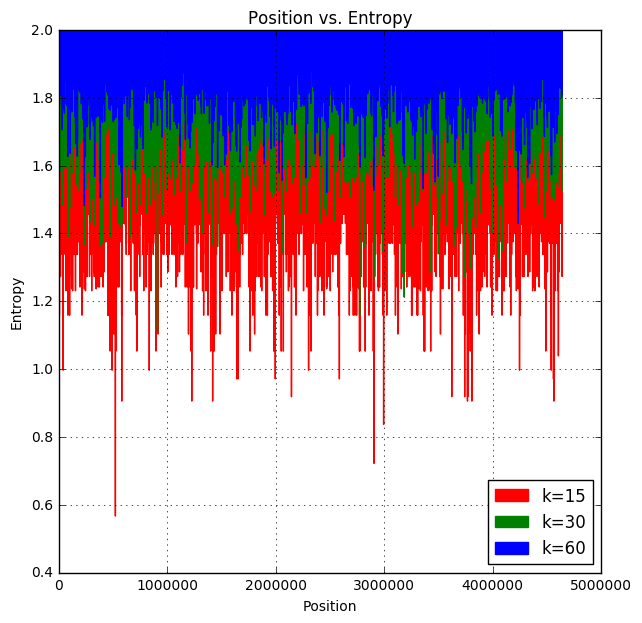

In [4]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

a = algSamp(15)
b = algSamp(30)
c = algSamp(60)

fig, ax = plt.subplots(figsize=(7,7))

ax.set_xlabel('Position')
ax.set_ylabel('Entropy')
ax.set_title('Position vs. Entropy')
plt.plot(a[0], a[1], 'k', color = 'r')
plt.plot(b[0], b[1], 'k', color = 'g')
plt.plot(c[0], c[1], 'k', color = 'b')

red_patch = mpatches.Patch(color='red', label='k=15')
green_patch = mpatches.Patch(color='green', label='k=30')
blue_patch = mpatches.Patch(color='blue', label='k=60')
plt.legend(handles=[red_patch, green_patch, blue_patch], loc=4)

plt.grid(True)
plt.show()

This cell of code draws a histogram of the entropy distrbution for k=10, using the alg() function

k = 10
Length: 4641652
Minimum Entropy: 0.000000 at position 380012
10-mer before: AAAGAGGAAA
Minimum entropy 10-mer: GGGGGGGGGG
10-mer after: CTAATCGGCA


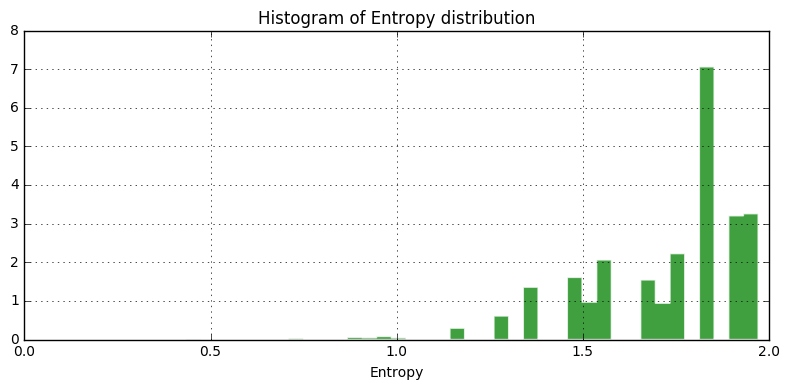

In [5]:
import numpy as np
import matplotlib.pyplot as plt

y = alg(10)
fig, ax1 = plt.subplots(figsize=(8,4))
#y2 = np.power(4, x)
#log = np.log10(y)
#log2 = np.log10(y2)

ax1.set_xlabel('Entropy')
#ax.set_yscale("log")
ax1.set_title('Histogram of Entropy distribution')

ax1.hist(y, 50, normed=1, histtype='stepfilled', edgecolor='w', facecolor='g', alpha=0.75)

plt.grid(True)
fig.tight_layout()
#plt.plot(x, log2, 'k')
plt.show()

This cell of code draws the graph of the average Entropy of all k-mers vs k for k in the range of 4 to 28, using the averageEntropy() function. The resulting graph, when plotted in a logarithmic regression model, gives the equation f(K) = 0.9 + 0.3*ln(K), and when plotted in a power regression model, gives f(K) = K^0.2. However, these models, though accurate for small K (<50), become very inaccurate for large K (especially the power model).

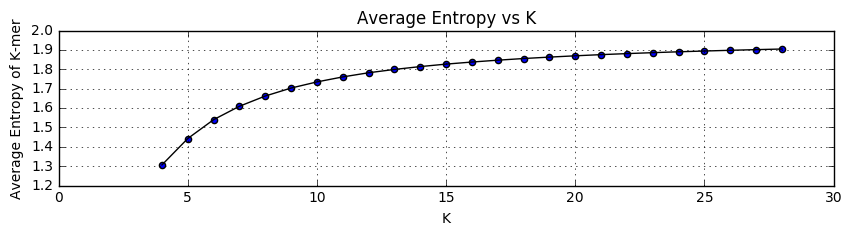

In [6]:
import numpy as np
import matplotlib.pyplot as plt

w = 0
x = []
y = []
for w in range(4,29):
    x.append(w)
    y.append(averageEntropy(w))

fig, ax = plt.subplots(figsize=(10,2))

ax.set_xlabel('K')
ax.set_ylabel('Average Entropy of K-mer')
ax.set_title('Average Entropy vs K')
plt.scatter(x, y)
plt.plot(x, y, 'k')
plt.grid(True)
plt.show()